In [199]:
import pandas as pd
import os
import numpy as np

import seaborn as sns; sns.set()
sns.set_style("ticks")
import matplotlib.pyplot as plt

custom_palette = ["red", "green", "orange", "blue", "black"]
sns.set_palette(custom_palette)

calib_method = 'logx_logreg'


args = {'cohort_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/cohort/all_cohorts.csv',
        'base_path': '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts',
        'plot_path': os.path.join('/labs/shahlab/projects/agataf/fairness_utility/eval_manuscript/plots', 'paper_plots'),
        'eval_fold':  'eval',
        'grp_label_dict': {1: 'Black women', 2: 'White women', 3: 'Black men', 4: 'White men', 'overall': 'Overall'} 
       }
os.makedirs(args['plot_path'], exist_ok=True)

save_plots=True

In [2]:
aggregate_path_all = '/labs/shahlab/projects/agataf/data/cohorts/pooled_cohorts/experiments/bmj_manuscript/'

plot_df_all = pd.read_csv(os.path.join(aggregate_path_all, 'bootstrap_standard_eval.csv'))

In [191]:
model_type_names = {'original_pce': 'PCE',
                    'revised_pce': 'rPCE',
                    'erm': 'BL',
                    'recalib_erm': 'rBL',
                    'eqodds_thr': 'EO'
                   }

metric_names = {'auc':                    'AUC', 
                'auprc':                  'AUPRC',
                'ace_rmse_logistic_log':  'ACE',
                'loss_bce':               'loss',
                'recall_0.075':           'Sensitivity (t=7.5%)',
                'recall_0.2':             'Sensitivity (t=20%)',
                'specificity_0.075':      'Specificity (t=7.5%)',
                'specificity_0.2':        'Specificity (t=20%)',
                'observation_rate_0.075': 'Implied threshold (t=7.5%)',
                'observation_rate_0.2':   'Implied threshold (t=20%)'
                
               }

group_names = {'overall': 'overall',
               '1': 'Black Women', 
               '2': 'White Women', 
               '3': 'Black Men', 
               '4': 'White Men'
              }

plot_x = {'auc': 0, 'auprc': 0, 
          'recall_0.075': 1, 'recall_0.2': 1,
          'specificity_0.075': 2, 'specificity_0.2': 2,
          'observation_rate_0.075': 3, 'observation_rate_0.2': 3}

plot_y = {'auc': 0, 'auprc': 1, 
          'recall_0.075': 0, 'recall_0.2': 1,
          'specificity_0.075': 0, 'specificity_0.2': 1,
          'observation_rate_0.075': 0, 'observation_rate_0.2': 1}

#plot_y = {'AUC': 0, 'AUPRC': 1, 'specificity_0.075': 0, 'specificity_0.2': 1}

plot_df = (plot_df_all.assign(x_axis = lambda x: x.metric.map(plot_x),
                              y_axis = lambda x: x.metric.map(plot_y),
                              model_type = lambda x: x.model_type.map(model_type_names),
                              metric = lambda x: x.metric.map(metric_names),
                              group = lambda x: x.group.map(group_names)
                                )
               #.query("metric == ['AUC', 'AUPRC', 'specificity_0.075', 'specificity_0.2']")
              )

model_type = np.where((plot_df.model_type=='EO') & (plot_df.model_id=='0.1'), 'mEO', plot_df.model_type)
model_type = np.where((plot_df.model_type=='EO') & (plot_df.model_id=='1.0'), 'sEO', model_type)


plot_df.model_type = pd.Categorical(model_type, 
                      categories=['PCE', 'rPCE', 'BL', 'rBL', 'mEO', 'sEO'],
                      ordered=True)




,model_type,group,metric,variable,value
0,mEO,Black Women,AUC,CI_lower,0.780922
1,mEO,Black Women,AUPRC,CI_lower,0.178691
2,mEO,Black Women,Implied threshold (t=7.5%),CI_lower,0.028045
3,mEO,Black Women,Implied threshold (t=20%),CI_lower,0.161021
4,mEO,Black Women,Sensitivity (t=7.5%),CI_lower,0.656360
...,...,...,...,...,...
715,rPCE,overall,Implied threshold (t=20%),CI_upper,0.233615
716,rPCE,overall,Sensitivity (t=7.5%),CI_upper,0.806829
717,rPCE,overall,Sensitivity (t=20%),CI_upper,0.322488
718,rPCE,overall,Specificity (t=7.5%),CI_upper,0.740696


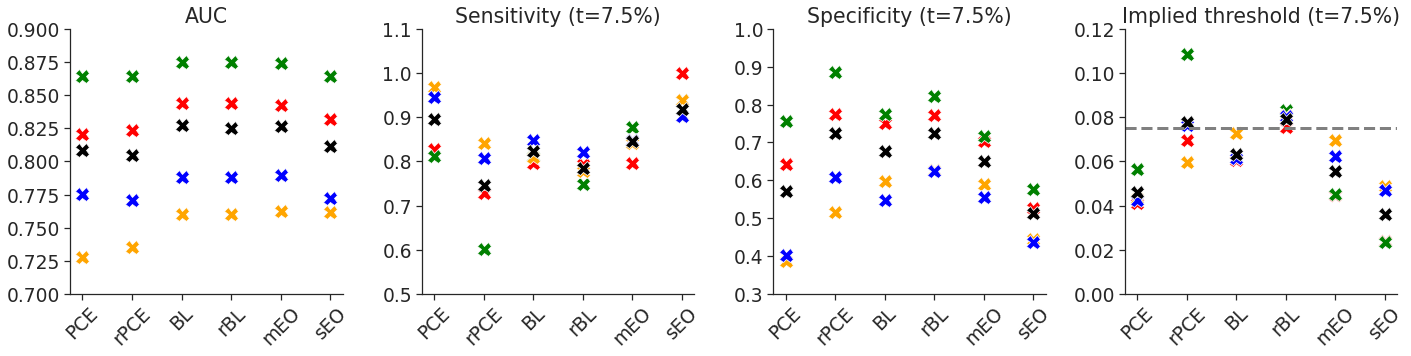

In [251]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

to_plot = plot_df.query("metric == ['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)']")
to_plot = to_plot.assign(metric = pd.Categorical(to_plot.metric, 
                      categories=['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)'],
                      ordered=True)
                        )

g=sns.relplot(data = to_plot,
                x = 'model_type',
                y = 'CI_med',
                col='metric',
                #row='y_axis',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
              marker='X',
              markersize=14,
                linestyle='')
(g.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

# plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
#            bbox_to_anchor=(-0.5,-.3)) 

sns.set(font_scale=1)
axes = g.axes.flatten()
axes[-1].axhline(0.075, ls='--', linewidth=3, color='grey')

if save_plots:
    output_path = os.path.join(args['plot_path'], 'discr_calib_2.png')
    g.savefig(output_path)



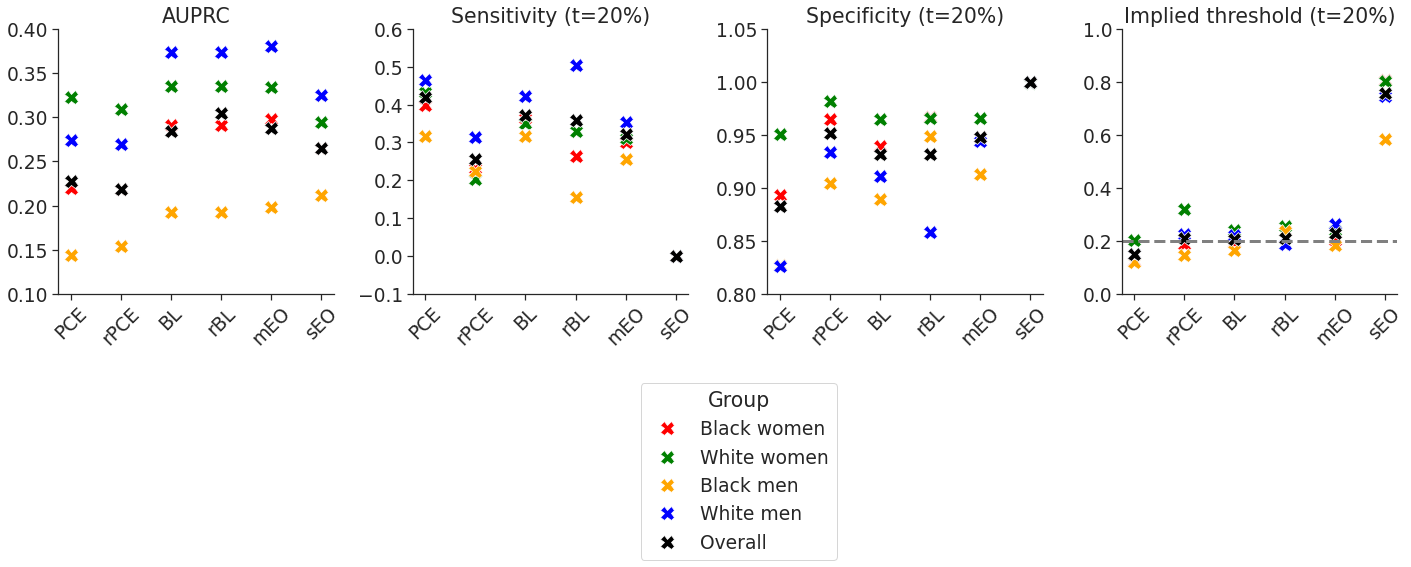

In [253]:
sns.set(font_scale=1.7)
sns.set_style("ticks")

#g=sns.relplot(data = plot_df.query("metric == ['AUPRC', 'sensitivity (t=20%)', 'specificity (t=20%)', 'observation rate (t=20%)']"),
to_plot = plot_df.query("metric == ['AUPRC', 'Sensitivity (t=20%)', 'Specificity (t=20%)', 'Implied threshold (t=20%)']")
to_plot = to_plot.assign(metric = pd.Categorical(to_plot.metric, 
                      categories=['AUPRC', 'Sensitivity (t=20%)', 'Specificity (t=20%)', 'Implied threshold (t=20%)'],
                      ordered=True)
                        )

g=sns.relplot(data = to_plot,               
              x = 'model_type',
              y = 'CI_med',
              col='metric',
            #row='y_axis',
              kind = 'line',
              palette = custom_palette, 
              hue='group',
              #err_style="bars",
              facet_kws= {'sharey': False, 'margin_titles': True},
              #err_kws = {'capsize': 5},
              legend=False,
              aspect=1,
              marker='X',
              markersize=14,
              linestyle='')
(g.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

plt.legend(title='Group', labels=args['grp_label_dict'].values(),
           bbox_to_anchor=(-1,-.3)) #bbox_to_anchor=(1, 1))

#plt.legend(bbox_to_anchor=(-1.3,-.3)) 

sns.set(font_scale=1)
axes = g.axes.flatten()
axes[-1].axhline(0.2, ls='--', linewidth=3, color='grey')


if save_plots:
    output_path = os.path.join(args['plot_path'], 'discr_calib_2.png')
    g.savefig(output_path)


In [218]:
round(plot_df.CI_lower, 3)

0      0.781
1      0.179
2      0.028
3      0.161
4      0.656
       ...  
235    0.191
236    0.680
237    0.192
238    0.707
239    0.943
Name: CI_lower, Length: 240, dtype: float64

In [230]:
#plot_df.assign(value = lambda x: str(round(x.CI_med, 3)) +  ' (' + str(round(x.CI_lower, 3))+', ' + str(round(x.CI_upper, 3)) + ')')

plot_df1 = plot_df.assign(value = lambda x: x.CI_med.round(3).astype(str) + 
               ' (' + x.CI_lower.round(3).astype(str)+', ' + 
               x.CI_upper.round(3).astype(str) + ')')


In [231]:
(plot_df1
 .query("phase=='test'")
 .drop(columns=['x_axis', 'y_axis', 'model_id', 'phase', 'CI_lower', 'CI_med', 'CI_upper'])
 .pivot(index=['metric', 'group'], columns='model_type')
 
)

value  \
model_type                                               PCE   
metric                     group                               
AUC                        Black Men    0.728 (0.655, 0.791)   
                           Black Women  0.821 (0.749, 0.883)   
                           White Men     0.775 (0.72, 0.828)   
                           White Women  0.864 (0.814, 0.908)   
                           overall      0.808 (0.778, 0.836)   
AUPRC                      Black Men    0.144 (0.111, 0.199)   
                           Black Women   0.22 (0.138, 0.347)   
                           White Men    0.274 (0.207, 0.374)   
                           White Women   0.323 (0.227, 0.45)   
                           overall      0.228 (0.189, 0.279)   
Implied threshold (t=20%)  Black Men    0.122 (0.106, 0.139)   
                           Black Women  0.125 (0.106, 0.145)   
                           White Men     0.15 (0.139, 0.162)   
                           White Women  0.206 (0.175, 0.245)   
                           overall      0.149 (0.141, 0.159)   
Implied threshold (t=7.5%) Black Men    0.044 (0.032, 0.056)   
                           Black Women  0.041 (0.025, 0.053)   
                           White Men    0.043 (0.028, 0.058)   
                           White Women  0.057 (0.042, 0.068)   
                           overall      0.046 (0.038, 0.053)   
Sensitivity (t=20%)        Black Men     0.318 (0.16, 0.475)   
                           Black Women  0.398 (0.231, 0.568)   
                           White Men    0.464 (0.342, 0.575)   
                           White Women   0.434 (0.29, 0.578)   
                           overall      0.419 (0.353, 0.492)   
Sensitivity (t=7.5%)       Black Men      0.968 (0.902, 1.0)   
                           Black Women   0.829 (0.69, 0.964)   
                           White Men    0.945 (0.889, 0.987)   
                           White Women  0.813 (0.689, 0.917)   
                           overall      0.895 (0.848, 0.939)   
Specificity (t=20%)        Black Men    0.827 (0.787, 0.865)   
                           Black Women   0.893 (0.865, 0.92)   
                           White Men    0.826 (0.797, 0.852)   
                           White Women  0.951 (0.935, 0.966)   
                           overall      0.883 (0.871, 0.896)   
Specificity (t=7.5%)       Black Men    0.387 (0.339, 0.441)   
                           Black Women  0.644 (0.602, 0.687)   
                           White Men     0.404 (0.368, 0.44)   
                           White Women  0.755 (0.724, 0.785)   
                           overall       0.573 (0.553, 0.59)   

                                                              \
model_type                                              rPCE   
metric                     group                               
AUC                        Black Men     0.735 (0.66, 0.802)   
                           Black Women  0.824 (0.757, 0.881)   
                           White Men    0.771 (0.711, 0.824)   
                           White Women  0.865 (0.817, 0.905)   
                           overall      0.805 (0.775, 0.833)   
AUPRC                      Black Men    0.155 (0.116, 0.227)   
                           Black Women  0.219 (0.135, 0.341)   
                           White Men     0.27 (0.201, 0.361)   
                           White Women  0.309 (0.212, 0.441)   
                           overall       0.219 (0.18, 0.267)   
Implied threshold (t=20%)  Black Men    0.148 (0.123, 0.183)   
                           Black Women   0.19 (0.148, 0.244)   
                           White Men    0.225 (0.193, 0.263)   
                           White Women  0.319 (0.257, 0.399)   
                           overall      0.212 (0.191, 0.234)   
Implied threshold (t=7.5%) Black Men     0.06 (0.047, 0.069)   
                           Black Women   0.07 (0.059, 0.078)   
                      

In [63]:
a = plot_df.query("metric == ['AUC', 'sensitivity_0.075', 'specificity_0.075', 'observation_rate_0.075']")
b=a.query("metric=='AUC'")


In [250]:
plot_df_melted = (plot_df
 .drop(columns=['phase', 'model_id', 'x_axis', 'y_axis'])
 .melt(id_vars = ['model_type', 'group', 'metric'])
)
plot_df_melted
# sns.set(font_scale=1.7)
# sns.set_style("ticks")

# to_plot = plot_df_melted.query("metric == ['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)']")
# to_plot = to_plot.assign(metric = pd.Categorical(to_plot.metric, 
#                       categories=['AUC', 'Sensitivity (t=7.5%)', 'Specificity (t=7.5%)', 'Implied threshold (t=7.5%)'],
#                       ordered=True)
#                         )

# g=sns.relplot(data = to_plot,
#                 x = 'model_type',
#                 y = 'value',
#                 col='metric',
#                 #row='y_axis',
#                 style = 'variable',
#                 kind = 'line',
#                 palette = custom_palette, 
#                 hue='group',
#                 #err_style="bars",
#                 facet_kws= {'sharey': False, 'margin_titles': True},
#                 #err_kws = {'capsize': 5},
#                 legend=False,
#                 aspect=1,
#              markers=['*','X', '*'],
#               markersize=14,
#                 linestyle=['','',''])
# (g.set_xlabels('')
#  .set_ylabels('')
#  .set_titles(row_template="", col_template="{col_name}")
#  .set_yticklabels()
#  .set_xticklabels(rotation=45)
# )

# # plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
# #            bbox_to_anchor=(-0.5,-.3)) 

# sns.set(font_scale=1)




In [ ]:
def errplot(model_type, CI_med, CI_lower, CI_upper, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=model_type, y=CI_med, lolims=CI_lower, uplims=CI_upper, kind="bar", ax=ax, **kwargs)

g = sns.FacetGrid(tip_sumstats, col="sex", row="smoker")
g.map_dataframe(errplot, "model_type", "CI_med", "CI_lower", "CI_upper")

In [77]:
g.axes[0,0].errorbar(b.model_type,
                     b.CI_med,
                     lolims=b.CI_lower,
                     uplims=b.CI_upper
                     #yerr = list(b.filter(['CI_lower', 'CI_upper']).to_records(index=False))
                    )

<ErrorbarContainer object of 3 artists>

In [89]:
b.model_type

0       mEqOdd
40      sEqOdd
80        Base
120        PCE
160    recBase
200     revPCE
Name: model_type, dtype: category
Categories (6, object): ['PCE' < 'revPCE' < 'Base' < 'mEqOdd' < 'sEqOdd' < 'recBase']

In [90]:
list(b.filter(['CI_lower', 'CI_upper']).to_records(index=False))

[(0.78092208, 0.89788388),
 (0.77405997, 0.88312031),
 (0.78189181, 0.89936456),
 (0.74917995, 0.88251691),
 (0.78189181, 0.89936456),
 (0.75658392, 0.88094605)]

TypeError: invalid type promotion

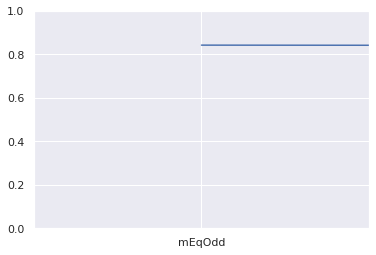

In [88]:
b=b.query("group=='1'")
plt.errorbar(x=b.model_type,
                     y=b.CI_med,
             yerr=list(b.filter(['CI_lower', 'CI_upper']).to_records(index=False)),
                     #lolims=b.CI_lower,
                     #uplims=b.CI_upper,
             capsize=10
                     #yerr = list(b.filter(['CI_lower', 'CI_upper']).to_records(index=False))
                    )

AttributeError: 'FacetGrid' object has no attribute 'show'

In [ ]:
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    #data = kwargs.pop("data")
    data.plot(x=df.x, y=df.y, yerr=df.filter(['CI_lower', 'CI_upper']).to_records(index=False), kind="bar", ax=ax, **kwargs)

g = sns.FacetGrid(tip_sumstats, col="sex", row="smoker")
g.map_dataframe(errplot, "day", "mean", "sem")

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5,6], temps_avg, yerr = (temps_low,temps_high))

In [53]:
plot_df.filter(['CI_lower', 'CI_upper']).to_records(index=False)

rec.array([(0.78092208, 0.89788388), (0.1786911 , 0.45744689),
           (0.02804533, 0.05878182), (0.16102123, 0.25408532),
           (0.65636007, 0.93201867), (0.13347879, 0.49907266),
           (0.6509636 , 0.74834437), (0.92424242, 0.96767241),
           (0.82584102, 0.91484335), (0.23572587, 0.47290333),
           (0.03023254, 0.05752381), (0.20181765, 0.29969295),
           (0.77188954, 0.95930481), (0.20453325, 0.45536871),
           (0.66230323, 0.75259101), (0.95112285, 0.97783788),
           (0.69287532, 0.82535842), (0.14372984, 0.28321459),
           (0.05488677, 0.08058783), (0.14973872, 0.23436458),
           (0.68323091, 0.93916351), (0.12487769, 0.41502237),
           (0.52427184, 0.64846662), (0.87908237, 0.9442623 ),
           (0.73151364, 0.84261568), (0.28142343, 0.48554408),
           (0.04317652, 0.07792442), (0.22593425, 0.30854133),
           (0.76417381, 0.93094843), (0.24552073, 0.46496732),
           (0.4774487 , 0.60188163), (0.92380952, 0.962

,CI_lower,CI_upper
0,0.780922,0.897884
1,0.178691,0.457447
2,0.028045,0.058782
3,0.161021,0.254085
4,0.656360,0.932019
...,...,...
235,0.191198,0.233615
236,0.680384,0.806829
237,0.192326,0.322488
238,0.707360,0.740696


In [ ]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

g=sns.relplot(data = plot_df,
                x = 'model_type',
                y = 'CI_med',
                col='x_axis',
                row='y_axis',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                #err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                #err_kws = {'capsize': 5},
                legend=False,
                aspect=1,
                marker='o',
                linestyle='')
(g.set_xlabels('model')
 .set_ylabels('')
 .set_titles(row_template="", col_template="")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
           bbox_to_anchor=(-0.5,-.3)) #bbox_to_anchor=(1, 1))
#plt.savefig("seaborn_combine_two_plots_with_shared_x_axis_Python.png")
sns.set(font_scale=1)


In [ ]:
# to_plot1 = (plot_df_all
#            .query("(metric=='auc') | (metric=='auprc') | (metric=='loss_bce')")
#            .assign(metric = lambda x: x.metric.map({'auc': 'AUC', 'auprc': 'AUPRC', 'loss_bce': 'loss'}),
#                   row='A')
#           )
# to_plot2 = (plot_df_all
#            .query("(metric=='emd_0_ova') | (metric=='emd_1_ova') | (metric=='ace_rmse_logistic_log')")
#            .assign(metric = lambda x: x.metric.map({'emd_0_ova': 'EMD (no outcome)',
#                              'emd_1_ova': 'EMD (outcome)', 'ace_rmse_logistic_log': 'ACE'}),
#                   row='B')
#           )

# to_plot = to_plot1.append(to_plot2)
to_plot1 = (plot_df_all
           .query("(metric=='auc') | (metric=='auprc') | (metric=='loss_bce')")
           .assign(metric = lambda x: x.metric.map({'auc': 'AUC', 'auprc': 'AUPRC', 'loss_bce': 'loss'}),
                  row='A',
                  group=lambda x: x.group.astype(str))
          )
to_plot2 = (plot_df_all
           .query("(metric=='emd_0_ova') | (metric=='emd_1_ova') | (metric=='ace_rmse_logistic_log')")
           .assign(metric = lambda x: x.metric.map({'emd_0_ova': 'EMD (no outcome)',
                             'emd_1_ova': 'EMD (outcome)', 'ace_rmse_logistic_log': 'ACE'}),
                  row='B',
                  group=lambda x: x.group.astype(str))
          )

to_plot = to_plot1.append(to_plot2)

In [ ]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

g=sns.relplot(data = to_plot1,
                x = 'model_type',
                y = 'performance',
                col='metric',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                err_kws = {'capsize': 5},
                legend=False,
                aspect=0.9,
                marker='o',
                linestyle='')
(g.set_xlabels('model')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
)
h=sns.relplot(data = to_plot2,
                x = 'model_type',
                y = 'performance',
                col='metric',
                kind = 'line',
                palette = custom_palette, 
                hue='group',
                err_style="bars",
                facet_kws= {'sharey': False, 'margin_titles': True},
                err_kws = {'capsize': 5},
                legend=False,
                aspect=0.9,
                marker='o',
                linestyle='')

(h.set_xlabels('')
 .set_ylabels('')
 .set_titles(row_template="", col_template="{col_name}")
 .set_yticklabels()
 .set_xticklabels(rotation=45)
)

plt.legend(title='Group', labels=['Black Women', 'White Women', 'Black Men', 'White Men'],
           bbox_to_anchor=(-0.5,-.3)) #bbox_to_anchor=(1, 1))
#plt.savefig("seaborn_combine_two_plots_with_shared_x_axis_Python.png")
sns.set(font_scale=1)

In [ ]:
df_threshold_1 = (plot_df_all.query(
#     '(metric=="f_positive_rate_075") | \
#                                      (metric=="f_negative_rate_075") | \
#                                      (metric=="outcome_rate_075")'
      '(metric=="specificity_0.075") |(metric=="recall_0.075") | (metric=="outcome_rate_075")'
)
                
                                     
                  .assign(threshold='7.5%')
                 )
df_threshold_2 = (plot_df_all.query(
    '(metric=="specificity_0.2") | (metric=="recall_0.2") |(metric=="outcome_rate_20")'
#     '(metric=="f_positive_rate_20") | \
#                                     (metric=="f_negative_rate_20")| \
#                                      (metric=="outcome_rate_20")'
)
#
                  .assign(threshold='20%')


                 )


df_thresholds = (df_threshold_1.append(df_threshold_2)
                  .assign(metric=lambda x: x.metric.map({'specificity_0.2': 'specificity',
                                                         'recall_0.2': 'sensitivity',
                                                         'f_positive_rate_20': 'FPR',
                                                         'f_negative_rate_20': 'FNR',
                                                         'specificity_0.075': 'specificity',
                                                         'recall_0.075': 'sensitivity',
                                                         'f_positive_rate_075': 'FPR',
                                                         'f_negative_rate_075': 'FNR',
                                                        'outcome_rate_075': 'outcome rate',
                                                        'outcome_rate_20': 'outcome rate'})
                ))

In [ ]:
df_thresholds.query("model_type=='recBase'").groupby([
    'metric', 'group', 'threshold'
]).count()

In [ ]:
df["column1"].replace({"a": "x", "b": "y"}, inplace=True)

In [ ]:
df_thresholds.group.replace({'all': 'overall'}, inplace=True)

In [ ]:
plot_args = {'x': 'model_type', 
            'y': 'performance',
            'col': 'metric',
            'kind': 'line',
            #'palette': custom_palette,
            'hue': 'group',
            'linestyle':'',
            'err_style': 'bars',
            'facet_kws': {'sharey': False, 'margin_titles': True},
            'err_kws': {'capsize': 5},
            'legend': False,
            'marker':'o',
            'aspect':1}

In [ ]:
# output_path = os.path.join(args['plot_path'], 
#                            '_'.join(('appendix', model_type, 'threshold_metrics.png')
#                                    )
#                           )


sns.set(font_scale=1.5)
sns.set_style("ticks")

g = sns.relplot(data = df_thresholds.query("model_type!=['EqOdd', 'recBase']"),
                **plot_args,
                row = 'threshold',

               )
#g.set(xscale="log")
(g.set_xlabels('')
 .set_ylabels('')
 .set_yticklabels()
 .set_titles( col_template="{col_name}")
)

axes = g.axes.flatten()
# axes[0].axhline(0.075, ls='--', linewidth=3, color='grey')
# axes[3].axhline(0.2, ls='--', linewidth=3, color='grey')

# axes[0].set_title("outcome rate at t=7.5%")
# axes[1].set_title("FPR at t=7.5%")
# axes[2].set_title("FNR at t=7.5%")
# axes[3].set_title("outcome rate at t=20%")
# axes[4].set_title("FPR at t=20%")
# axes[5].set_title("FNR at t=20%")

# plt.legend(title='Group', labels=['all','Black Women', 'White Women', 'Black Men', 'White Men'],
#            bbox_to_anchor=(-0.5,-.3)) 

sns.set(font_scale=1)

# if save_plots:
#     g.savefig(output_path)